In [1]:
import torch
from torch.utils.data import DataLoader
from Utils.build_dataset import paths_dataset
from torchvision import transforms
from Models.unet_model import UNet
from Utils.FishDataset import FishDataset
from Utils.training import training_loop, predict, iou_np
import matplotlib.pyplot as plt
import random
import numpy as np

In [2]:
dtype = torch.float32
if torch.cuda.is_available():
    device = torch.device('cuda:0')
else:
    device = torch.device('cpu')
print('using device:', device)

using device: cuda:0


In [3]:
label_dict = {0 : "Black Sea Sprat", 1 : "Sea Bass", 2 : "Red Mullet", 3 : "Trout", 4 : "Striped Red Mullet", 
              5 : "Shrimp", 6 : "Red Sea Bream", 7 : "Hourse Mackerel", 8 : "Gilt-Head Bream"}

## Carregando as Imagens

In [4]:
path = 'Dataset/Fish_Dataset/Fish_Dataset/'
df_train_pd, df_valid_pd, df_test_pd = paths_dataset(path)

In [5]:
img_size = 256
threshold = 0.5
transforms = transforms.Compose([transforms.ToPILImage(), transforms.Resize((img_size, img_size)), transforms.ToTensor()])

In [6]:
df_train = FishDataset(df_train_pd, transforms, transforms)

In [7]:
df_valid = FishDataset(df_valid_pd, transforms, transforms)

In [8]:
df_test = FishDataset(df_test_pd, transforms, transforms)

In [9]:
df_train[0][1].shape

torch.Size([1, 256, 256])

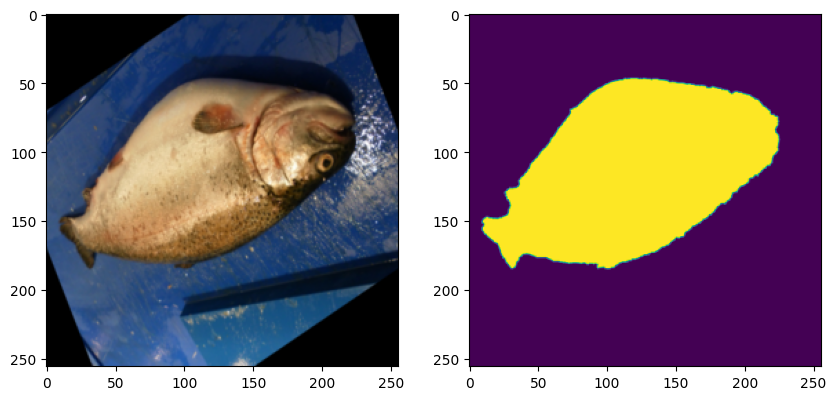

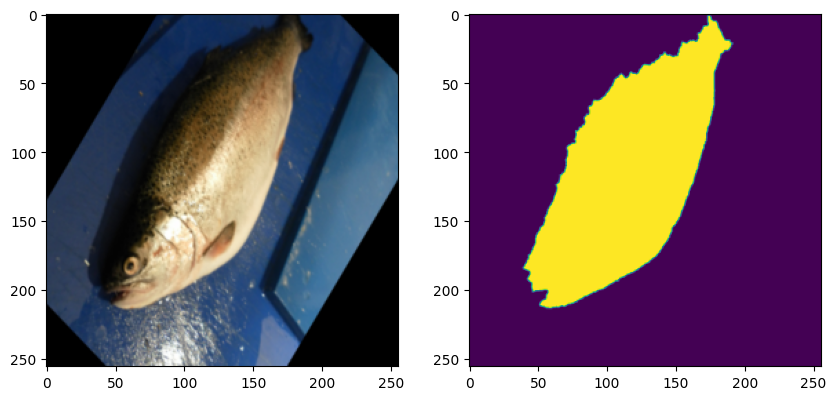

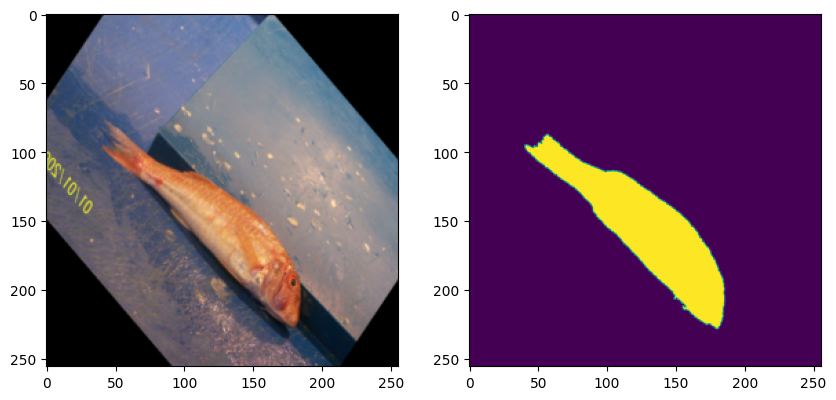

In [10]:
for i in range(3):
    n = random.randint(0, (len(df_train)))
    fig = plt.figure(figsize=(10, 100))
    
    fig.add_subplot(15, 2, 1)
    #plt.title(label_dict[df_train[n][2]])
    plt.imshow(df_train[n][0].permute(1, 2, 0))
    
    fig.add_subplot(15, 2, 2)
    #plt.title(label_dict[df_train[n][2]])
    plt.imshow(df_train[n][1].permute(1, 2, 0))

## Construindo o Modelo

In [11]:
model = UNet(outSize = (img_size, img_size))
model.to(device, dtype=dtype)

UNet(
  (encoder): Encoder(
    (encBlocks): ModuleList(
      (0): Block(
        (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
        (relu): ReLU()
        (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1))
      )
      (1): Block(
        (conv1): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
        (relu): ReLU()
        (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
      )
      (2): Block(
        (conv1): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
        (relu): ReLU()
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
      )
    )
    (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (decoder): Decoder(
    (upconvs): ModuleList(
      (0): ConvTranspose2d(64, 32, kernel_size=(2, 2), stride=(2, 2))
      (1): ConvTranspose2d(32, 16, kernel_size=(2, 2), stride=(2, 2))
    )
    (dec_blocks): ModuleList(
      (0): Block(
        (conv1): Conv2d(64, 32, kernel_size=(3, 3), str

In [12]:
epochs = 30
batch_size = 32
lr = 1e-3
train_loader = DataLoader(df_train, batch_size=batch_size, shuffle=True, num_workers=4)
valid_loader = DataLoader(df_valid, batch_size=batch_size, shuffle=False, num_workers=4)
criterion = torch.nn.BCEWithLogitsLoss()
sigmoid = torch.nn.Sigmoid()
optimizer = torch.optim.Adam(model.parameters(), lr = lr)

In [13]:
len(train_loader.dataset)

5400

In [ ]:
model, optimizer, train_losses, valid_losses, train_iou_list, valid_iou_list = training_loop(epochs, model, train_loader, valid_loader, criterion, optimizer, device, dtype)

Epoch 1 out of 30


100%|██████████████████████████████████████████████████| 169/169 [00:42<00:00,  3.95it/s]


Train loss: 0.1721	Valid loss: 0.1006	Train IoU: 62.18	Valid IoU: 76.08
Epoch 2 out of 30


100%|██████████████████████████████████████████████████| 169/169 [00:35<00:00,  4.76it/s]


Train loss: 0.0985	Valid loss: 0.0946	Train IoU: 76.77	Valid IoU: 80.26
Epoch 3 out of 30


100%|██████████████████████████████████████████████████| 169/169 [00:37<00:00,  4.51it/s]


Train loss: 0.0931	Valid loss: 0.0882	Train IoU: 77.40	Valid IoU: 78.07
Epoch 4 out of 30


100%|██████████████████████████████████████████████████| 169/169 [00:35<00:00,  4.77it/s]


Train loss: 0.0885	Valid loss: 0.0866	Train IoU: 78.36	Valid IoU: 81.27
Epoch 5 out of 30


100%|██████████████████████████████████████████████████| 169/169 [00:35<00:00,  4.74it/s]


Train loss: 0.0879	Valid loss: 0.0837	Train IoU: 78.70	Valid IoU: 80.27
Epoch 6 out of 30


100%|██████████████████████████████████████████████████| 169/169 [00:35<00:00,  4.77it/s]


Train loss: 0.0841	Valid loss: 0.0804	Train IoU: 79.32	Valid IoU: 81.38
Epoch 7 out of 30


100%|██████████████████████████████████████████████████| 169/169 [00:35<00:00,  4.75it/s]


Train loss: 0.0816	Valid loss: 0.0803	Train IoU: 79.88	Valid IoU: 78.75
Epoch 8 out of 30


100%|██████████████████████████████████████████████████| 169/169 [00:36<00:00,  4.60it/s]


Train loss: 0.0816	Valid loss: 0.0793	Train IoU: 79.90	Valid IoU: 78.46
Epoch 9 out of 30


100%|██████████████████████████████████████████████████| 169/169 [00:35<00:00,  4.74it/s]


Train loss: 0.0803	Valid loss: 0.0786	Train IoU: 80.28	Valid IoU: 80.30
Epoch 10 out of 30


100%|██████████████████████████████████████████████████| 169/169 [00:37<00:00,  4.53it/s]


Train loss: 0.0783	Valid loss: 0.0766	Train IoU: 80.64	Valid IoU: 80.27
Epoch 11 out of 30


100%|██████████████████████████████████████████████████| 169/169 [00:35<00:00,  4.72it/s]


Train loss: 0.0779	Valid loss: 0.0769	Train IoU: 80.95	Valid IoU: 79.93
Epoch 12 out of 30


100%|██████████████████████████████████████████████████| 169/169 [00:35<00:00,  4.69it/s]


Train loss: 0.0766	Valid loss: 0.0760	Train IoU: 81.17	Valid IoU: 80.57
Epoch 13 out of 30


100%|██████████████████████████████████████████████████| 169/169 [00:37<00:00,  4.53it/s]


Train loss: 0.0755	Valid loss: 0.0737	Train IoU: 81.48	Valid IoU: 83.43
Epoch 14 out of 30


100%|██████████████████████████████████████████████████| 169/169 [00:37<00:00,  4.46it/s]


Train loss: 0.0741	Valid loss: 0.0730	Train IoU: 81.84	Valid IoU: 82.25
Epoch 15 out of 30


100%|██████████████████████████████████████████████████| 169/169 [00:36<00:00,  4.65it/s]


Train loss: 0.0743	Valid loss: 0.0731	Train IoU: 81.70	Valid IoU: 82.05
Epoch 16 out of 30


100%|██████████████████████████████████████████████████| 169/169 [00:37<00:00,  4.48it/s]


Train loss: 0.0731	Valid loss: 0.0738	Train IoU: 82.05	Valid IoU: 81.08
Epoch 17 out of 30


100%|██████████████████████████████████████████████████| 169/169 [00:37<00:00,  4.51it/s]


Train loss: 0.0719	Valid loss: 0.0703	Train IoU: 82.33	Valid IoU: 82.59
Epoch 18 out of 30


100%|██████████████████████████████████████████████████| 169/169 [00:38<00:00,  4.44it/s]


Train loss: 0.0717	Valid loss: 0.0698	Train IoU: 82.29	Valid IoU: 83.56
Epoch 19 out of 30


100%|██████████████████████████████████████████████████| 169/169 [00:38<00:00,  4.44it/s]


Train loss: 0.0715	Valid loss: 0.0711	Train IoU: 82.44	Valid IoU: 82.41
Epoch 20 out of 30


 42%|█████████████████████▍                             | 71/169 [00:21<00:14,  6.61it/s]

In [14]:
torch.save(model.state_dict(), "unet.pkl")

### Carregando Modelo

In [12]:
model.load_state_dict(torch.load("unet.pkl"))

<All keys matched successfully>

## Avaliando o Modelo

In [15]:
test_loader = DataLoader(df_test, batch_size=batch_size, shuffle=False, num_workers=4)

In [16]:
model.eval()
model.to(device)

UNet(
  (encoder): Encoder(
    (encBlocks): ModuleList(
      (0): Block(
        (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
        (relu): ReLU()
        (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1))
      )
      (1): Block(
        (conv1): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
        (relu): ReLU()
        (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
      )
      (2): Block(
        (conv1): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
        (relu): ReLU()
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
      )
    )
    (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (decoder): Decoder(
    (upconvs): ModuleList(
      (0): ConvTranspose2d(64, 32, kernel_size=(2, 2), stride=(2, 2))
      (1): ConvTranspose2d(32, 16, kernel_size=(2, 2), stride=(2, 2))
    )
    (dec_blocks): ModuleList(
      (0): Block(
        (conv1): Conv2d(64, 32, kernel_size=(3, 3), str

In [17]:
img_list_test = list(df_test_pd['image'])
mask_list_test = list(df_test_pd['mask'])

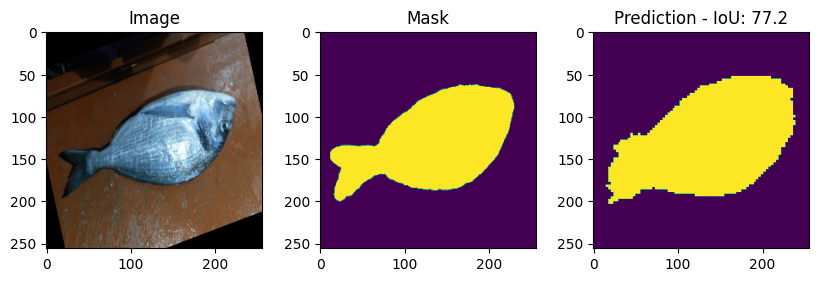

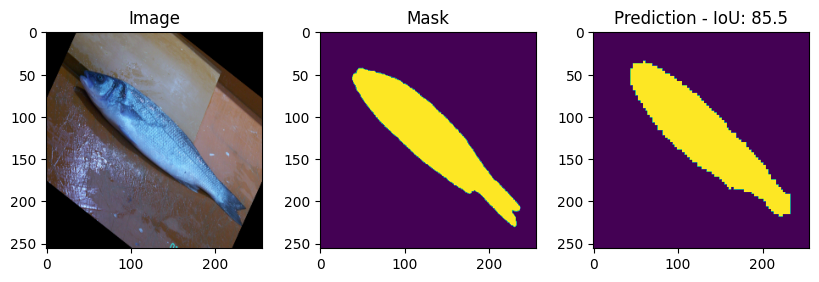

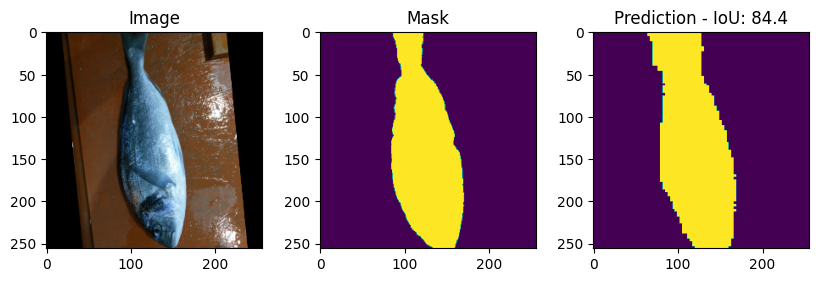

In [21]:
for i in range(3):
    n = random.randint(0, (len(img_list_test)))
    fig = plt.figure(figsize=(10, 50))
    
    image = cv2.imread(img_list_test[n])
    image = cv2.resize(image, (img_size, img_size))
    mask = cv2.imread(mask_list_test[n])
    mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
    mask = cv2.resize(mask, (img_size, img_size))
    pred = predict(model, image, device)
    iou = iou_np(mask, pred) * 100
    
    
    fig.add_subplot(15, 3, 1)
    plt.title('Image')
    plt.imshow(image)
    
    fig.add_subplot(15, 3, 2)
    plt.title('Mask')
    plt.imshow(mask)
    
    fig.add_subplot(15, 3, 3)
    plt.title(f'Prediction - IoU: {iou:.1f}')
    plt.imshow(pred)

In [24]:
running_iou = 0

for i in range(len(img_list_test)):
    image = cv2.imread(img_list_test[n])
    image = cv2.resize(image, (img_size, img_size))
    mask = cv2.imread(mask_list_test[n])
    mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
    mask = cv2.resize(mask, (img_size, img_size))
    pred = predict(model, image, threshold, device)
    iou_pred = iou_np(mask, pred)
    running_iou += iou_pred

iou_test = (running_iou / len(img_list_test)) * 100
print(f'IoU: {iou_test:.1f}')

IoU: 84.4


In [33]:
running_iou = 0

for i, (x, y) in enumerate(test_loader):
    with torch.no_grad():
        x = x.to(device)
        y = y.numpy()
        pred = model(x).squeeze()
        pred = torch.sigmoid(pred)
        pred = pred.cpu().numpy()
        pred = np.where(pred>0.5, 1.0, 0.0).astype(np.float32)
        iou_pred = iou_np(y, pred)
        running_iou += iou_pred

iou_test = (running_iou / i) * 100
print(f'IoU Teste: {iou_test:.1f}')

IoU Teste: 28.0


In [28]:
len(test_loader.dataset)

1800

In [26]:
print(i)

1799


## Teste Foto Gil

Text(0.5, 1.0, 'Prediction')

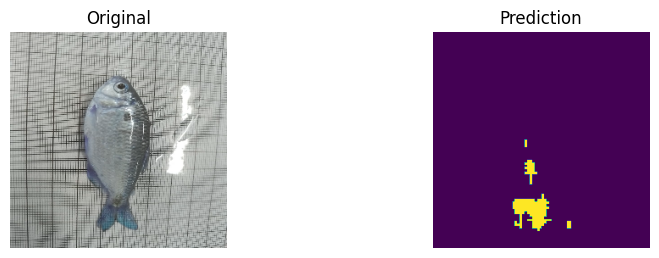

In [38]:
fig = plt.figure(figsize=(10, 50))
image = cv2.imread('peixe.jpg')
#image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (img_size, img_size))
pred = predict(model, image, device)
#iou = iou_np(mask, pred) * 100

fig.add_subplot(15, 2, 1)
plt.imshow(image)
plt.axis('off')
plt.title('Original')

fig.add_subplot(15, 2, 2)
plt.imshow(pred)
plt.axis('off')
plt.title('Prediction')